In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rng = np.random.default_rng(seed=42)
m = 200
X = 2 * rng.random((m,1))
Y = 4 + 3 * X + rng.standard_normal((m,1))

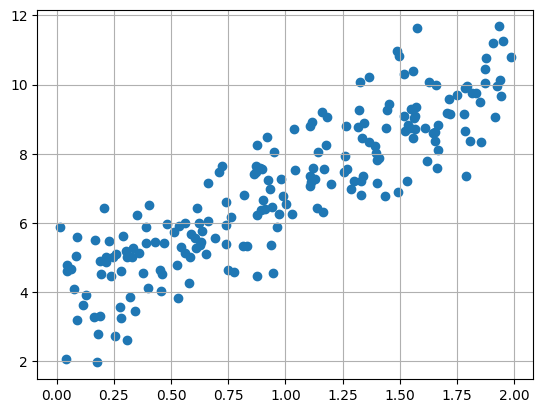

In [8]:
plt.scatter(X,Y)
plt.grid()
plt.show()

In [31]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.pinv(X_b.T @ X_b)@ X_b.T @ Y
theta_best

array([[3.69084138],
       [3.32960458]])

In [17]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[ 3.69084138],
       [10.35005055]])

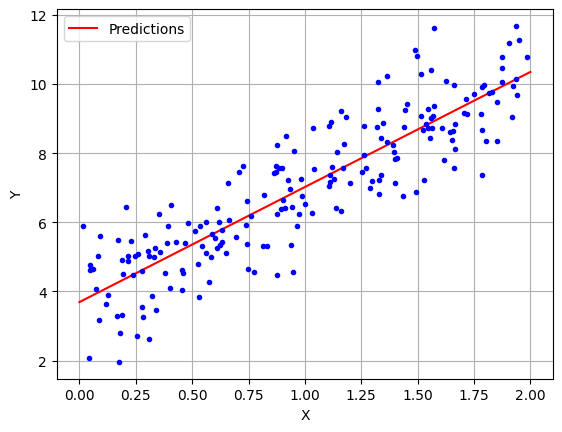

In [18]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, Y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,Y)
print(f"""Intercept: {lin_reg.intercept_[0]},
Weights: {lin_reg.coef_[0]}
      """)

Intercept: 3.6908413834642553,
Weights: [3.32960458]
      


In [30]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, Y,rcond=1e-6)
theta_best_svd

array([[3.69084138],
       [3.32960458]])

In [ ]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

rng = np.random.default_rng(seed=42)
theta = rng.standard_normal([2,1])

for epoch in range(n_epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta - Y)
    theta = theta - eta * gradients
    
theta

array([[3.69084138],
       [3.32960458]])

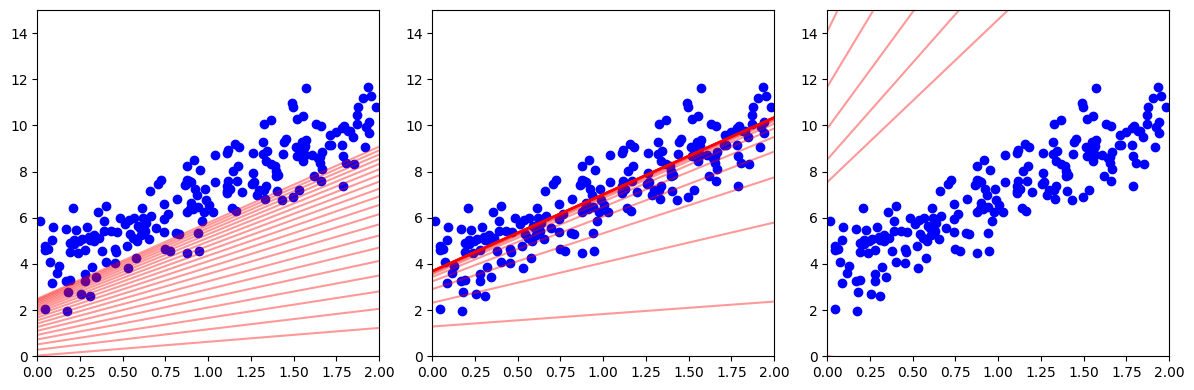

In [44]:

def plot_gradient_descent(eta):
    m = len(X_b)
    theta = np.random.randn(2, 1)

    plt.scatter(X, Y, color="blue")

    for epoch in range(100):
        gradients = 2/m * X_b.T @ (X_b @ theta - Y)
        theta = theta - eta * gradients

        if epoch < 20:
            X_new = np.array([[0], [2]])
            X_new_b = np.c_[np.ones((2,1)), X_new]
            Y_predict = X_new_b @ theta
            plt.plot(X_new, Y_predict, "r-", alpha=0.4)

    plt.xlim(0, 2)
    plt.ylim(0, 15)

# Create figure
plt.figure(figsize=(12,4))

plt.subplot(131)
plot_gradient_descent(0.02)

plt.subplot(132)
plot_gradient_descent(0.1)

plt.subplot(133)
plot_gradient_descent(0.5)

plt.tight_layout()
plt.show()